# Molecular Edit Data Visualizations

This notebook provides exploratory visualizations of the molecular edit dataset:
- Edit distribution statistics
- Top edits by frequency
- Molecule-level edit counts
- Property analysis
- Dataset overview

In [27]:
# Imports
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Set figure defaults
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11

print("✓ Imports complete")

✓ Imports complete


In [28]:
# Load data
DATA_FILE = '../data/pairs/chembl_pairs_long_sample.csv'

print("Loading data...")
df = pd.read_csv(DATA_FILE)

print(f"\n{'='*80}")
print("DATASET OVERVIEW")
print(f"{'='*80}")
print(f"Total rows: {len(df):,}")
print(f"Unique source molecules: {df['mol_a'].nunique():,}")
print(f"Unique result molecules: {df['mol_b'].nunique():,}")
print(f"Unique edits: {df['edit_name'].nunique():,}")
print(f"Unique properties: {df['property_name'].nunique():,}")
print(f"Unique targets: {df['target_name'].nunique():,}")

print(f"\nProperties in dataset:")
for prop in df['property_name'].unique()[:20]:
    count = (df['property_name'] == prop).sum()
    print(f"  - {prop}: {count:,} pairs")
if df['property_name'].nunique() > 20:
    print(f"  ... and {df['property_name'].nunique() - 20} more properties")

print(f"\n✓ Data loaded successfully")

Loading data...

DATASET OVERVIEW
Total rows: 1,881,223
Unique source molecules: 8,719
Unique result molecules: 8,698
Unique edits: 279,064
Unique properties: 27
Unique targets: 10

Properties in dataset:
  - epidermal_growth_fac_ic50: 367,457 pairs
  - d(2)_dopamine_recept_ki: 486,753 pairs
  - vascular_endothelial_ic50: 228,741 pairs
  - voltage_gated_inward_ic50: 293,113 pairs
  - tyrosine_protein_kin_ic50: 31,721 pairs
  - beta_secretase_1_ic50: 300,771 pairs
  - beta_secretase_1_ki: 14,893 pairs
  - beta_secretase_1_ec50: 20,632 pairs
  - vascular_endothelial_ki: 13,696 pairs
  - tyrosine_protein_kin_ki: 4,166 pairs
  - epidermal_growth_fac_ki: 515 pairs
  - voltage_gated_inward_ki: 68,350 pairs
  - d(2)_dopamine_recept_ic50: 42,961 pairs
  - vascular_endothelial_kd: 29 pairs
  - voltage_gated_inward_ec50: 374 pairs
  - bromodomain_containi_ic50: 1,039 pairs
  - epidermal_growth_fac_kd: 132 pairs
  - nuclear_receptor_ror_ec50: 52 pairs
  - nuclear_receptor_ror_ic50: 442 pairs
  - 

## 1. Edit Distribution Histogram

Distribution of how many times each edit appears in the dataset.

Edit frequency statistics:
  Total unique edits: 279,064
  Mean occurrences: 6.7
  Median occurrences: 3.0
  Max occurrences: 571
  Min occurrences: 1


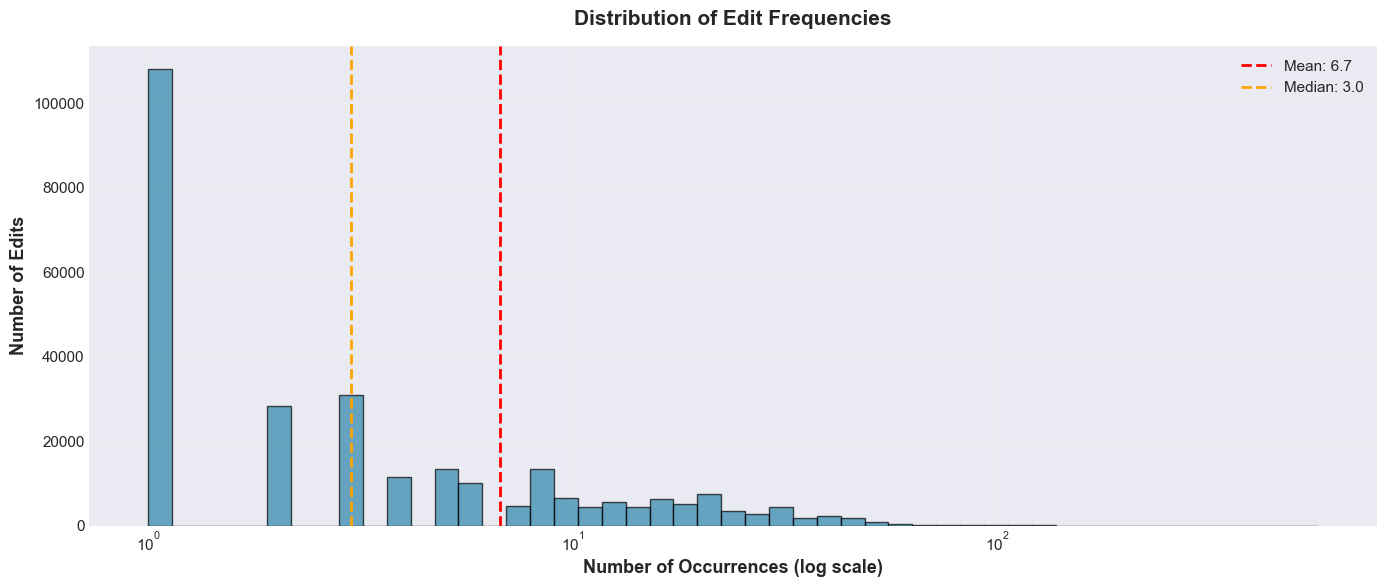


✓ Edit distribution histogram complete


In [29]:
# Count edit frequencies
edit_counts = df['edit_name'].value_counts()

print(f"Edit frequency statistics:")
print(f"  Total unique edits: {len(edit_counts):,}")
print(f"  Mean occurrences: {edit_counts.mean():.1f}")
print(f"  Median occurrences: {edit_counts.median():.1f}")
print(f"  Max occurrences: {edit_counts.max():,}")
print(f"  Min occurrences: {edit_counts.min():,}")

# Create histogram
fig, ax = plt.subplots(figsize=(14, 6))

# Use log scale bins for better visualization
bins = np.logspace(0, np.log10(edit_counts.max()), 50)
ax.hist(edit_counts.values, bins=bins, alpha=0.7, color='#2E86AB', edgecolor='black')

ax.set_xscale('log')
ax.set_xlabel('Number of Occurrences (log scale)', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Edits', fontsize=13, fontweight='bold')
ax.set_title('Distribution of Edit Frequencies', fontsize=15, fontweight='bold', pad=15)
ax.grid(alpha=0.3, linestyle='--')

# Add statistics lines
ax.axvline(edit_counts.mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {edit_counts.mean():.1f}')
ax.axvline(edit_counts.median(), color='orange', linestyle='--', linewidth=2,
           label=f'Median: {edit_counts.median():.1f}')

ax.legend(fontsize=11, framealpha=0.9)
plt.tight_layout()
plt.show()

print(f"\n✓ Edit distribution histogram complete")

## 2. Top 10 Edits by Volume

Bar plot showing the most frequent molecular transformations.

Top 10 Most Frequent Edits:

Rank   Edit Name                                                         Count   % of Total
------------------------------------------------------------------------------------------
1      F_to_Cl_exchange                                                    571        0.03%
2      homologation_C1_to_C2                                               516        0.03%
3      c1ccccc1>>Fc1ccccc1                                                 514        0.03%
4      Clc1ccccc1>>FC(F)(F)c1ccccc1                                        462        0.02%
5      Fc1ccccc1>>Fc1ccccc1                                                443        0.02%
6      Fc1ccccc1>>FC(F)(F)c1ccccc1                                         427        0.02%
7      Fc1ccccc1C(F)(F)F>>Fc1cccc(C(F)(F)F)c1                              416        0.02%
8      Fc1ccccc1>>Clc1ccccc1                                               394        0.02%
9      Fc1ccccc1C(F)(F)F>>FC(F)(F)Oc1ccccc1         

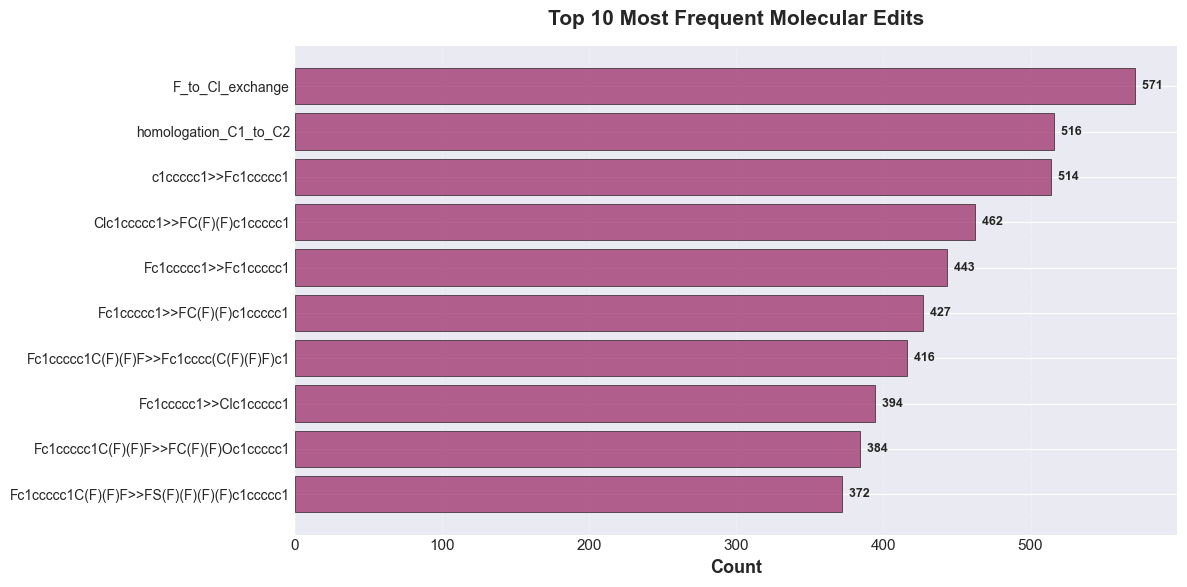


✓ Top 10 edits visualization complete


In [30]:
# Get top 10 edits
top_10_edits = edit_counts.head(10)

print(f"Top 10 Most Frequent Edits:")
print(f"\n{'Rank':<6} {'Edit Name':<60} {'Count':>10} {'% of Total':>12}")
print("-" * 90)

total_pairs = len(df)
for rank, (edit_name, count) in enumerate(top_10_edits.items(), 1):
    pct = 100 * count / total_pairs
    display_name = edit_name if len(edit_name) <= 60 else edit_name[:57] + "..."
    print(f"{rank:<6} {display_name:<60} {count:>10,} {pct:>11.2f}%")

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data
edit_names_display = [name if len(name) <= 50 else name[:47] + "..." 
                      for name in top_10_edits.index]
counts = top_10_edits.values
y_pos = np.arange(len(edit_names_display))

# Create horizontal bar chart
bars = ax.barh(y_pos, counts, color='#A23B72', alpha=0.8, edgecolor='black', linewidth=0.5)

# Customize
ax.set_yticks(y_pos)
ax.set_yticklabels(edit_names_display, fontsize=10)
ax.invert_yaxis()
ax.set_xlabel('Count', fontsize=13, fontweight='bold')
ax.set_title('Top 10 Most Frequent Molecular Edits', fontsize=15, fontweight='bold', pad=15)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add count labels
for i, (bar, count) in enumerate(zip(bars, counts)):
    ax.text(count, i, f'  {count:,}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✓ Top 10 edits visualization complete")

## 3. Most Common Properties

Bar plot showing the most frequently measured properties.

Most Common Properties:

Rank   Property Name                                                     Count   % of Total
------------------------------------------------------------------------------------------
1      d(2)_dopamine_recept_ki                                         486,753       25.87%
2      epidermal_growth_fac_ic50                                       367,457       19.53%
3      beta_secretase_1_ic50                                           300,771       15.99%
4      voltage_gated_inward_ic50                                       293,113       15.58%
5      vascular_endothelial_ic50                                       228,741       12.16%
6      voltage_gated_inward_ki                                          68,350        3.63%
7      d(2)_dopamine_recept_ic50                                        42,961        2.28%
8      tyrosine_protein_kin_ic50                                        31,721        1.69%
9      beta_secretase_1_ec50                            

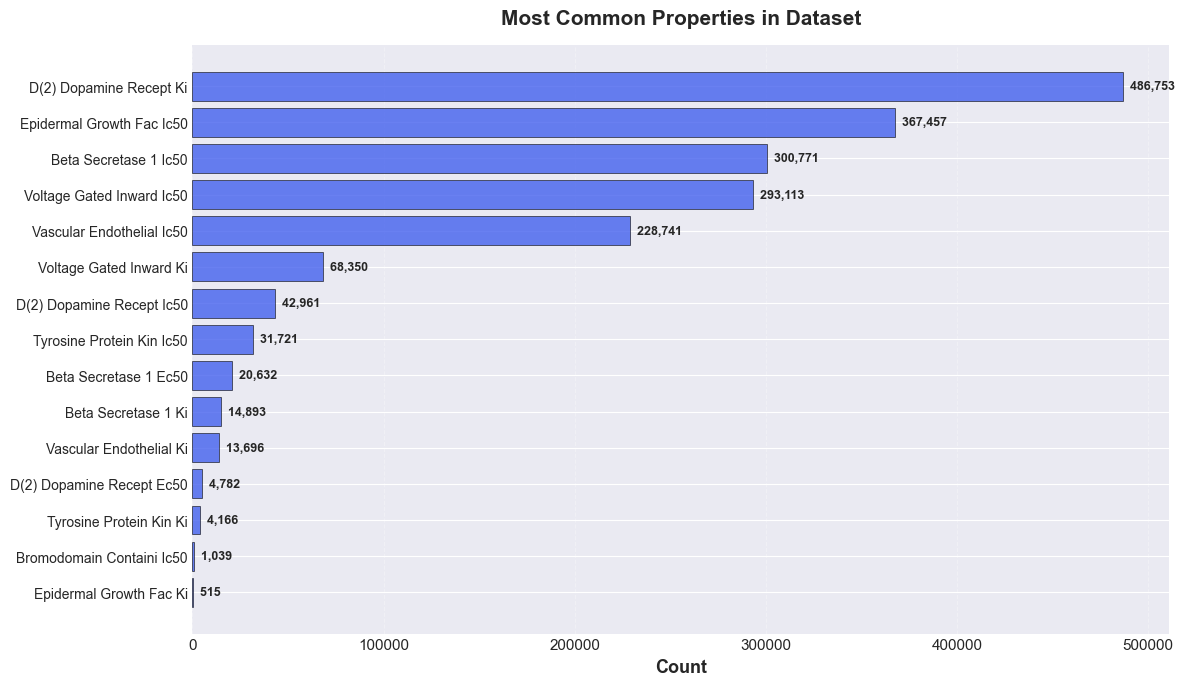


✓ Property distribution visualization complete


In [31]:
# Count property frequencies
property_counts = df['property_name'].value_counts()

print(f"Most Common Properties:")
print(f"\n{'Rank':<6} {'Property Name':<60} {'Count':>10} {'% of Total':>12}")
print("-" * 90)

for rank, (prop_name, count) in enumerate(property_counts.head(15).items(), 1):
    pct = 100 * count / total_pairs
    display_name = prop_name if len(prop_name) <= 60 else prop_name[:57] + "..."
    print(f"{rank:<6} {display_name:<60} {count:>10,} {pct:>11.2f}%")

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 7))

# Prepare data
top_properties = property_counts.head(15)
prop_names_display = [name.replace('_', ' ').title() if len(name) <= 40 else name[:37].replace('_', ' ').title() + "..." 
                      for name in top_properties.index]
counts = top_properties.values
y_pos = np.arange(len(prop_names_display))

# Create horizontal bar chart
bars = ax.barh(y_pos, counts, color='#4361EE', alpha=0.8, edgecolor='black', linewidth=0.5)

# Customize
ax.set_yticks(y_pos)
ax.set_yticklabels(prop_names_display, fontsize=10)
ax.invert_yaxis()
ax.set_xlabel('Count', fontsize=13, fontweight='bold')
ax.set_title('Most Common Properties in Dataset', fontsize=15, fontweight='bold', pad=15)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add count labels
for i, (bar, count) in enumerate(zip(bars, counts)):
    ax.text(count, i, f'  {count:,}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✓ Property distribution visualization complete")

## 4. Top 5 Properties for the 3 Most Common Edits

For each of the top 3 edits, show which properties are most commonly measured.

Analyzing properties for top 3 most common edits:
  1. F_to_Cl_exchange (571 occurrences)
  2. homologation_C1_to_C2 (516 occurrences)
  3. c1ccccc1>>Fc1ccccc1 (514 occurrences)


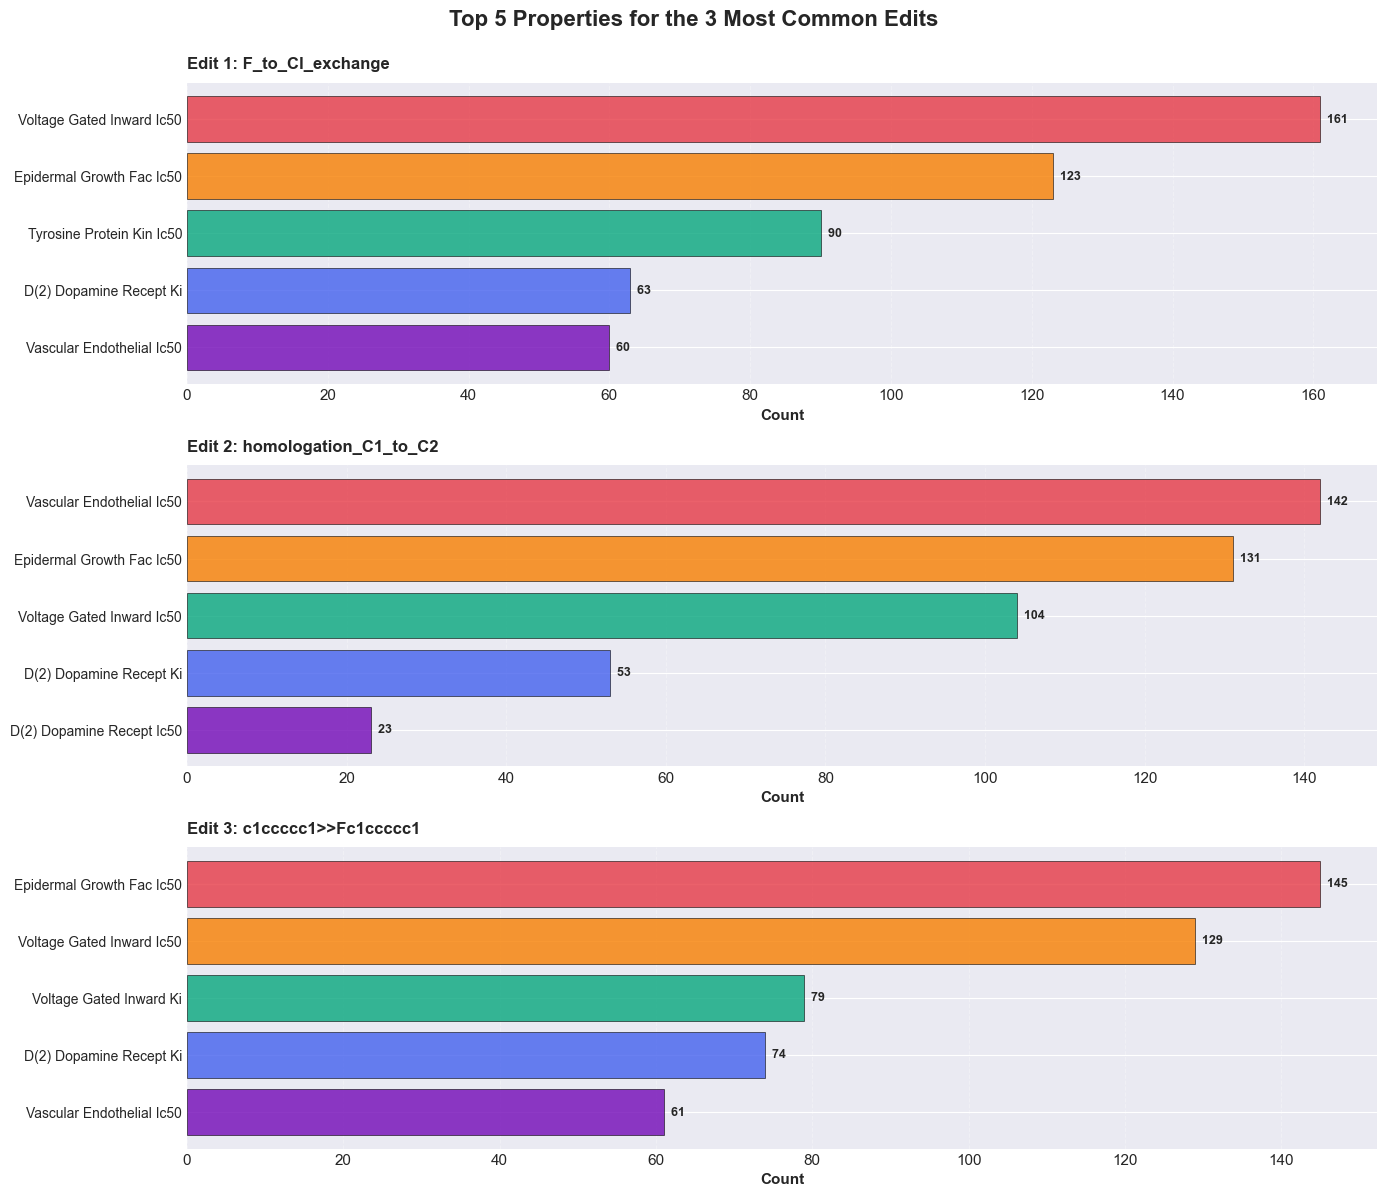


✓ Edit-property analysis complete


In [32]:
# Get top 3 edits
top_3_edits = edit_counts.head(3)

print(f"Analyzing properties for top 3 most common edits:")
for i, (edit_name, edit_count) in enumerate(top_3_edits.items(), 1):
    display_name = edit_name if len(edit_name) <= 70 else edit_name[:67] + "..."
    print(f"  {i}. {display_name} ({edit_count:,} occurrences)")

# Create figure with 3 subplots (one per edit)
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

for idx, (edit_name, ax) in enumerate(zip(top_3_edits.index, axes)):
    # Filter data for this edit
    edit_data = df[df['edit_name'] == edit_name]
    
    # Count properties for this edit
    edit_property_counts = edit_data['property_name'].value_counts().head(5)
    
    # Prepare data
    prop_names = [name.replace('_', ' ').title() for name in edit_property_counts.index]
    counts = edit_property_counts.values
    y_pos = np.arange(len(prop_names))
    
    # Create horizontal bar chart
    colors = ['#E63946', '#F77F00', '#06A77D', '#4361EE', '#7209B7']
    bars = ax.barh(y_pos, counts, color=colors[:len(counts)], alpha=0.8, 
                   edgecolor='black', linewidth=0.5)
    
    # Customize
    ax.set_yticks(y_pos)
    ax.set_yticklabels(prop_names, fontsize=10)
    ax.invert_yaxis()
    ax.set_xlabel('Count', fontsize=11, fontweight='bold')
    
    # Title with edit name
    edit_display = edit_name if len(edit_name) <= 60 else edit_name[:57] + "..."
    ax.set_title(f"Edit {idx+1}: {edit_display}", 
                fontsize=12, fontweight='bold', pad=10, loc='left')
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Add count labels
    for i, (bar, count) in enumerate(zip(bars, counts)):
        ax.text(count, i, f'  {count:,}', va='center', fontsize=9, fontweight='bold')

plt.suptitle('Top 5 Properties for the 3 Most Common Edits', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"\n✓ Edit-property analysis complete")

## 5. Edits Per Molecule Distribution

How many different edits can be performed on each source molecule?

Edits per molecule statistics:
  Total source molecules: 8,719
  Mean edits per molecule: 33.7
  Median edits per molecule: 15.0
  Max edits on one molecule: 812
  Min edits on one molecule: 1


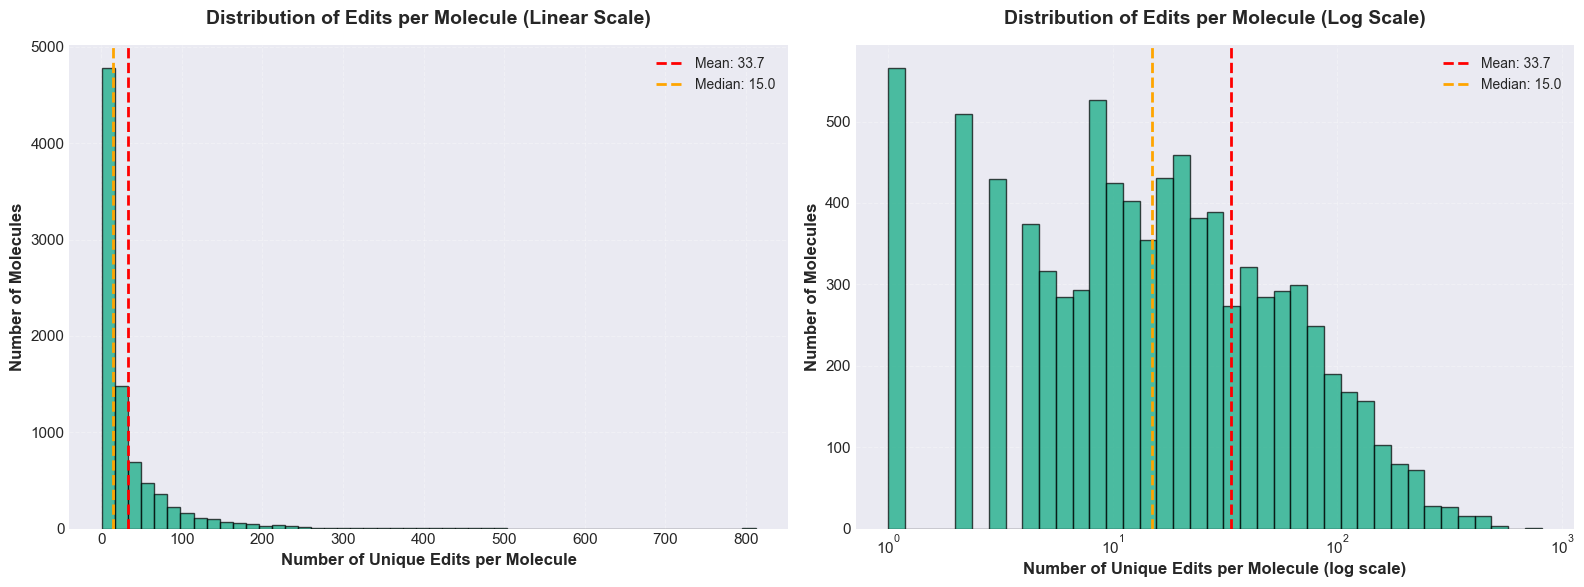


✓ Edits per molecule distribution complete


In [33]:
# Count edits per source molecule
edits_per_molecule = df.groupby('mol_a')['edit_name'].nunique()

print(f"Edits per molecule statistics:")
print(f"  Total source molecules: {len(edits_per_molecule):,}")
print(f"  Mean edits per molecule: {edits_per_molecule.mean():.1f}")
print(f"  Median edits per molecule: {edits_per_molecule.median():.1f}")
print(f"  Max edits on one molecule: {edits_per_molecule.max():,}")
print(f"  Min edits on one molecule: {edits_per_molecule.min():,}")

# Create histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Linear scale histogram
ax1.hist(edits_per_molecule.values, bins=50, alpha=0.7, color='#06A77D', edgecolor='black')
ax1.set_xlabel('Number of Unique Edits per Molecule', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Molecules', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of Edits per Molecule (Linear Scale)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.grid(alpha=0.3, linestyle='--')

# Add statistics lines
ax1.axvline(edits_per_molecule.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {edits_per_molecule.mean():.1f}')
ax1.axvline(edits_per_molecule.median(), color='orange', linestyle='--', linewidth=2,
            label=f'Median: {edits_per_molecule.median():.1f}')
ax1.legend(fontsize=10)

# Log scale histogram
bins_log = np.logspace(0, np.log10(edits_per_molecule.max()), 40)
ax2.hist(edits_per_molecule.values, bins=bins_log, alpha=0.7, color='#06A77D', edgecolor='black')
ax2.set_xscale('log')
ax2.set_xlabel('Number of Unique Edits per Molecule (log scale)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Molecules', fontsize=12, fontweight='bold')
ax2.set_title('Distribution of Edits per Molecule (Log Scale)', 
              fontsize=14, fontweight='bold', pad=15)
ax2.grid(alpha=0.3, linestyle='--')

# Add statistics lines
ax2.axvline(edits_per_molecule.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {edits_per_molecule.mean():.1f}')
ax2.axvline(edits_per_molecule.median(), color='orange', linestyle='--', linewidth=2,
            label=f'Median: {edits_per_molecule.median():.1f}')
ax2.legend(fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n✓ Edits per molecule distribution complete")

## 6. Top 10 Molecules by Edit Count

Which molecules have the most diverse transformations?

Top 10 Molecules with Most Unique Edits:

Rank   SMILES (truncated)                                                 Unique Edits  Total Pairs
----------------------------------------------------------------------------------------------------
1      COc1cc(-c2nn(C(C)C)c3ncnc(N)c23)ccc1NC(=O)OC(C)(C)C                         812        1,636
2      COc1cc(Br)cc(-c2nn(C(C)C)c3ncnc(N)c23)c1                                    502          789
3      COc1cc(-c2nn(C(C)C)c3ncnc(N)c23)cc(OC)c1OC                                  491          670
4      COc1cc(F)c(-c2nn(C(C)C)c3ncnc(N)c23)cc1F                                    491          885
5      COc1cc(-c2nn(C(C)C)c3ncnc(N)c23)ccc1N                                       483        1,185
6      COc1cc(-c2nn(C(C)C)c3ncnc(N)c23)ccc1F                                       469        1,192
7      COc1cccc(-c2nn(C(C)C)c3ncnc(N)c23)c1OC                                      450          573
8      COc1ccc(C23CC2CN(CCCSc2nnc(-c4ocnc4C)n2C)C3)cc1C(F

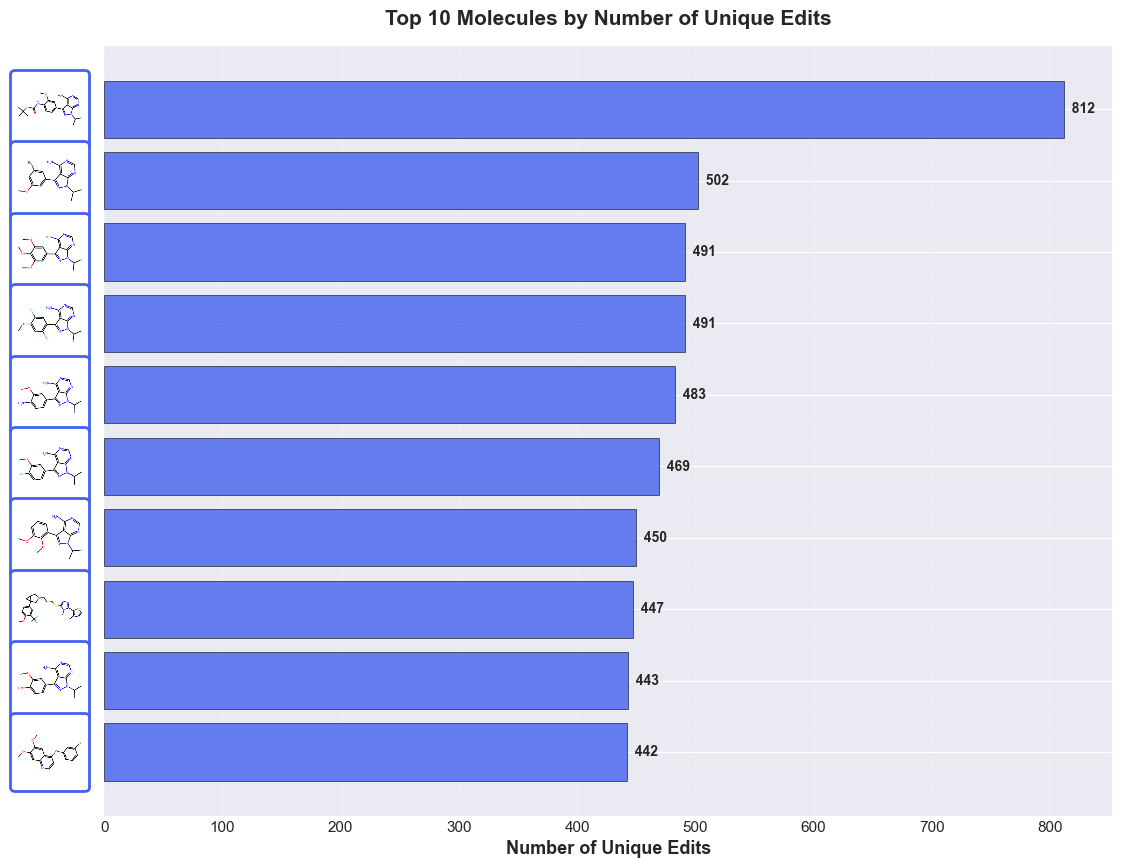


✓ Top 10 molecules visualization complete


In [38]:
# Get top 10 molecules by edit count
top_10_molecules = edits_per_molecule.sort_values(ascending=False).head(10)

# Also get total pairs per molecule
pairs_per_molecule = df.groupby('mol_a').size()

print(f"Top 10 Molecules with Most Unique Edits:")
print(f"\n{'Rank':<6} {'SMILES (truncated)':<65} {'Unique Edits':>13} {'Total Pairs':>12}")
print("-" * 100)

for rank, (smiles, edit_count) in enumerate(top_10_molecules.items(), 1):
    smiles_display = smiles[:60] + "..." if len(smiles) > 60 else smiles
    total_pairs = pairs_per_molecule[smiles]
    print(f"{rank:<6} {smiles_display:<65} {edit_count:>13,} {total_pairs:>12,}")

# Create visualization with molecular structures
from rdkit import Chem
from rdkit.Chem import Draw
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

print(f"\nGenerating molecular structures...")

# Create figure
fig, ax = plt.subplots(figsize=(14, 10))

# Prepare data
edit_counts_top = top_10_molecules.values
y_pos = np.arange(len(edit_counts_top))

# Create horizontal bar chart
bars = ax.barh(y_pos, edit_counts_top, color='#4361EE', alpha=0.8, 
               edgecolor='black', linewidth=0.5)

# Add count labels
for i, (bar, count) in enumerate(zip(bars, edit_counts_top)):
    ax.text(count, i, f'  {count:,}', va='center', fontsize=10, fontweight='bold')

# Generate and add molecular structure images on the left
mol_img_size = (200, 200)
for i, (smiles, edit_count) in enumerate(top_10_molecules.items()):
    try:
        # Generate molecule from SMILES
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            # Generate image
            img = Draw.MolToImage(mol, size=mol_img_size)
            
            # Convert PIL image to array
            img_array = np.array(img)
            
            # Create OffsetImage
            imagebox = OffsetImage(img_array, zoom=0.25)
            
            # Position the image closer to the y-axis (changed from -0.15 to -0.08)
            ab = AnnotationBbox(imagebox, (-0.02, i), 
                               xycoords=('axes fraction', 'data'),
                               frameon=True,
                               box_alignment=(1, 0.5),
                               bboxprops=dict(edgecolor='#4361EE', linewidth=2, 
                                            facecolor='white', boxstyle='round,pad=0.3'))
            ax.add_artist(ab)
    except Exception as e:
        print(f"  Warning: Could not render molecule {i+1}: {str(e)[:50]}")

# Customize axes
ax.set_yticks(y_pos)
ax.set_yticklabels([''] * len(y_pos))  # Remove text labels since we have images
ax.invert_yaxis()
ax.set_xlabel('Number of Unique Edits', fontsize=13, fontweight='bold')
ax.set_title('Top 10 Molecules by Number of Unique Edits', 
             fontsize=15, fontweight='bold', pad=15)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Adjust layout to make room for molecular images (reduced left margin from 0.25 to 0.18)
plt.subplots_adjust(left=0.18)

plt.show()

print(f"\n✓ Top 10 molecules visualization complete")

## 7. Summary Statistics

In [35]:
print("="*80)
print("DATASET SUMMARY STATISTICS")
print("="*80)

print(f"\n{'Metric':<50} {'Value':>20}")
print("-" * 80)

# Overall stats
print(f"{'Total molecular pairs':<50} {len(df):>20,}")
print(f"{'Unique source molecules':<50} {df['mol_a'].nunique():>20,}")
print(f"{'Unique result molecules':<50} {df['mol_b'].nunique():>20,}")
print(f"{'Unique edits':<50} {df['edit_name'].nunique():>20,}")
print(f"{'Unique properties':<50} {df['property_name'].nunique():>20,}")
print(f"{'Unique targets':<50} {df['target_name'].nunique():>20,}")

print(f"\n{'Edit Statistics':<50}")
print("-" * 80)
print(f"{'Mean edit frequency':<50} {edit_counts.mean():>20.1f}")
print(f"{'Median edit frequency':<50} {edit_counts.median():>20.1f}")
print(f"{'Most common edit frequency':<50} {edit_counts.max():>20,}")
print(f"{'Least common edit frequency':<50} {edit_counts.min():>20,}")

print(f"\n{'Molecule Statistics':<50}")
print("-" * 80)
print(f"{'Mean edits per molecule':<50} {edits_per_molecule.mean():>20.1f}")
print(f"{'Median edits per molecule':<50} {edits_per_molecule.median():>20.1f}")
print(f"{'Max edits on one molecule':<50} {edits_per_molecule.max():>20,}")
print(f"{'Min edits on one molecule':<50} {edits_per_molecule.min():>20,}")

print(f"\n{'Property Change Statistics':<50}")
print("-" * 80)
print(f"{'Mean property change (delta)':<50} {df['delta'].mean():>20.3f}")
print(f"{'Median property change (delta)':<50} {df['delta'].median():>20.3f}")
print(f"{'Std dev property change':<50} {df['delta'].std():>20.3f}")
print(f"{'Max positive change':<50} {df['delta'].max():>20.3f}")
print(f"{'Max negative change':<50} {df['delta'].min():>20.3f}")

print(f"\n{'='*80}")
print("✓ All visualizations complete!")
print(f"{'='*80}")

DATASET SUMMARY STATISTICS

Metric                                                            Value
--------------------------------------------------------------------------------
Total molecular pairs                                         1,881,223
Unique source molecules                                           8,719
Unique result molecules                                           8,698
Unique edits                                                    279,064
Unique properties                                                    27
Unique targets                                                       10

Edit Statistics                                   
--------------------------------------------------------------------------------
Mean edit frequency                                                 6.7
Median edit frequency                                               3.0
Most common edit frequency                                          571
Least common edit frequency           